In [1]:
%cd C:\Users\HAI.NH194039\Documents\recsyss\recsys\recsys-xmrec-team10
import argparse
import random

import os
from os import path
import json
import sys
import pickle
from zipfile import ZipFile
from copy import deepcopy

sys.path.insert(1, 'src')
from model import Model
from utils import *
from data import *
from train_baseline import *

C:\Users\HAI.NH194039\Documents\recsyss\recsys\recsys-xmrec-team10


In [2]:
parser = create_arg_parser()
args = parser.parse_args(['--cuda'])
args.alias = 'nmf'
args.tgt_market = 't1'
args.src_markets = 'none' #ne' | 's1' | 's1_s2_s3'
args.use_qrel = False
args.tgt_market_valid = f'DATA/{args.tgt_market}/valid_run.tsv'
args.tgt_market_test = f'DATA/{args.tgt_market}/test_run.tsv'
args.exp_name = 'xxz'
args.fastmode = True
#args.idbank_pretrain = 'checkpoints/t1_none_xxz.pickle'
#args.pretrain = 'checkpoints/t1_none_xxz.model'
args.train_data_file = 'train_5core.tsv'
args.num_negative = 8
args.batch_size = 1024
args.freeze_bottom = False
args.latent_dim = 32
args.latent_dim_mlp = 32
args.mlp_layers = (64, 80, 48, 24)
args.optimizer = 'adam'
args.sample_func = lambda: random.uniform(0, 0.1)
args.lr = 0.008
args.num_epoch = 200
args.l2_reg = 1e-7
args.seed = 73
if torch.cuda.is_available() and args.cuda:
    torch.cuda.set_device(0)
args.device = torch.device('cuda' if torch.cuda.is_available() and args.cuda else 'cpu')
print("Device:", args.device)

Device: cpu


In [6]:
indv

{'t1U1007418': {'P_5': 0.2,
  'P_10': 0.1,
  'P_20': 0.05,
  'recall_5': 1.0,
  'recall_10': 1.0,
  'recall_20': 1.0,
  'ndcg_cut_10': 0.38685280723454163,
  'map_cut_10': 0.2},
 't1U1005548': {'P_5': 0.2,
  'P_10': 0.1,
  'P_20': 0.05,
  'recall_5': 1.0,
  'recall_10': 1.0,
  'recall_20': 1.0,
  'ndcg_cut_10': 1.0,
  'map_cut_10': 1.0},
 't1U1002792': {'P_5': 0.0,
  'P_10': 0.0,
  'P_20': 0.0,
  'recall_5': 0.0,
  'recall_10': 0.0,
  'recall_20': 0.0,
  'ndcg_cut_10': 0.0,
  'map_cut_10': 0.0},
 't1U1007846': {'P_5': 0.0,
  'P_10': 0.0,
  'P_20': 0.0,
  'recall_5': 0.0,
  'recall_10': 0.0,
  'recall_20': 0.0,
  'ndcg_cut_10': 0.0,
  'map_cut_10': 0.0},
 't1U1009113': {'P_5': 0.2,
  'P_10': 0.1,
  'P_20': 0.05,
  'recall_5': 1.0,
  'recall_10': 1.0,
  'recall_20': 1.0,
  'ndcg_cut_10': 1.0,
  'map_cut_10': 1.0},
 't1U1006112': {'P_5': 0.2,
  'P_10': 0.1,
  'P_20': 0.05,
  'recall_5': 1.0,
  'recall_10': 1.0,
  'recall_20': 1.0,
  'ndcg_cut_10': 1.0,
  'map_cut_10': 1.0},
 't1U1004231':

In [ ]:
print(args)
indv = build(args)

Namespace(data_dir='DATA/', tgt_market='t1', src_markets='none', use_qrel=False, tgt_market_valid='DATA/t1/valid_run.tsv', tgt_market_test='DATA/t1/test_run.tsv', exp_name='xxz', train_data_file='train_5core.tsv', alias='nmf', pretrain=None, idbank_pretrain=None, freeze_bottom=False, num_epoch=200, batch_size=1024, lr=0.008, l2_reg=1e-07, optimizer='adam', latent_dim=32, latent_dim_mlp=32, num_negative=8, sample_func=<function <lambda> at 0x0000013ED7CB8670>, mlp_layers=(64, 80, 48, 24), drop_rate=0.2, cuda=True, seed=73, fastmode=True, device=device(type='cpu'), **{' fastmode': True})
Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 32)
  (gmf_embedding_item): Embedding(1386, 32)
  (mlp_embedding_user): Embedding(2698, 32)
  (mlp_embedding_item): Embedding(1386, 32)
  (fc_layers): ModuleList(
    (0): Linear(in_features=64, out_features=80, bias=True)
    (1): Linear(in_f

Total Train Loss:  0.003373363804922714  Time:  5.560125350952148
Total Valid Loss:  1.686350922893595  Time:  1.7174053192138672
--------------------------------------------------------------------------------
Epoch 32 starts !
Total Train Loss:  0.0033106560148621744  Time:  5.129277229309082
Total Valid Loss:  1.6883412709942571  Time:  2.3228237628936768
--------------------------------------------------------------------------------
Epoch 33 starts !
Total Train Loss:  0.003316106156289922  Time:  5.758557558059692
Total Valid Loss:  1.6641421638153218  Time:  2.1083598136901855
--------------------------------------------------------------------------------
Epoch 34 starts !
Total Train Loss:  0.0033070816391960562  Time:  5.685790061950684
Total Valid Loss:  1.6844880393257848  Time:  1.7493202686309814
--------------------------------------------------------------------------------
Epoch 35 starts !
Total Train Loss:  0.003266410620861574  Time:  5.902213096618652
Total Valid L

Total Train Loss:  0.003085533190637052  Time:  5.613997220993042
Total Valid Loss:  1.6439084929448586  Time:  2.1731503009796143
--------------------------------------------------------------------------------
Epoch 68 starts !
Total Train Loss:  0.003096809049508389  Time:  5.659748554229736
Total Valid Loss:  1.6285001481020893  Time:  2.257816791534424
--------------------------------------------------------------------------------
Epoch 69 starts !
Total Train Loss:  0.0030222420050423442  Time:  6.788436651229858
Total Valid Loss:  1.613253994120492  Time:  2.6180717945098877
--------------------------------------------------------------------------------
Epoch 70 starts !
Total Train Loss:  0.003060729066555986  Time:  5.670810699462891
Total Valid Loss:  1.6444769578951377  Time:  2.164593458175659
--------------------------------------------------------------------------------
Epoch 71 starts !
Total Train Loss:  0.0030587769982894893  Time:  5.842475891113281
Total Valid Los

Total Train Loss:  0.002929819291565201  Time:  5.731805086135864
Total Valid Loss:  1.6214451558060117  Time:  1.966778039932251
--------------------------------------------------------------------------------
Epoch 104 starts !
Total Train Loss:  0.0029251880007069237  Time:  5.595688104629517
Total Valid Loss:  1.6156870987680223  Time:  2.0486226081848145
--------------------------------------------------------------------------------
Epoch 105 starts !
Total Train Loss:  0.002929457591179048  Time:  5.534341096878052
Total Valid Loss:  1.623913460307651  Time:  2.5498616695404053
--------------------------------------------------------------------------------
Epoch 106 starts !
Total Train Loss:  0.0029232001168965605  Time:  5.418761253356934
Total Valid Loss:  1.629021473504879  Time:  1.9983923435211182
--------------------------------------------------------------------------------
Epoch 107 starts !
Total Train Loss:  0.0028886344308044353  Time:  6.000860691070557
Total Vali

Total Train Loss:  0.002826838032746246  Time:  5.0050368309021
Total Valid Loss:  1.6053958689724956  Time:  1.8002328872680664
--------------------------------------------------------------------------------
Epoch 140 starts !
Total Train Loss:  0.0028497445938107423  Time:  4.98117208480835
Total Valid Loss:  1.621280595108315  Time:  1.8621387481689453
--------------------------------------------------------------------------------
Epoch 141 starts !
Total Train Loss:  0.0028593784286990503  Time:  4.653414726257324
Total Valid Loss:  1.5987164168446153  Time:  1.8570172786712646
--------------------------------------------------------------------------------
Epoch 142 starts !
Total Train Loss:  0.002872026864589983  Time:  4.805262088775635
Total Valid Loss:  1.6384409224545513  Time:  1.9030382633209229
--------------------------------------------------------------------------------
Epoch 143 starts !
Total Train Loss:  0.0028497132289659424  Time:  5.361129522323608
Total Valid

In [5]:
score = []
for _, do in enumerate([9, 5, 2]):
    args.num_negative = do
    ndcg = build(args)
    print('num_negative: ', do)
    score.append(ndcg)

Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 16)
  (gmf_embedding_item): Embedding(1386, 16)
  (mlp_embedding_user): Embedding(2698, 16)
  (mlp_embedding_item): Embedding(1386, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=8, bias=True)
  )
  (affine_output): Linear(in_features=24, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Pretrained weights from checkpoints/t1_none_xx1.model are loaded!
Epoch 0 starts !
Total Train Loss:  0.024670196435181424  Time:  3.6103062629699707
Total Valid Loss:  2.2042336463928223  Time:  0.07579970359802246
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.

Total Train Loss:  0.02346707895048894  Time:  3.7399978637695312
Total Valid Loss:  2.122089227040609  Time:  0.030917882919311523
--------------------------------------------------------------------------------
Epoch 34 starts !
Total Train Loss:  0.02320287992673305  Time:  4.1110053062438965
Total Valid Loss:  2.144674380620321  Time:  0.0359036922454834
--------------------------------------------------------------------------------
Epoch 35 starts !
Total Train Loss:  0.023305253659297403  Time:  3.7080862522125244
Total Valid Loss:  2.146566947301229  Time:  0.027925491333007812
--------------------------------------------------------------------------------
Epoch 36 starts !
Total Train Loss:  0.023306958823620032  Time:  4.533910036087036
Total Valid Loss:  2.088955799738566  Time:  0.03690147399902344
--------------------------------------------------------------------------------
Epoch 37 starts !
Total Train Loss:  0.023231908184243366  Time:  4.415160894393921
Total Valid 

Total Train Loss:  0.023626276799900967  Time:  3.148582935333252
Total Valid Loss:  2.0988001823425293  Time:  0.027926921844482422
--------------------------------------------------------------------------------
Epoch 14 starts !
Total Train Loss:  0.023575236851518803  Time:  3.1575562953948975
Total Valid Loss:  2.0925145149230957  Time:  0.02892303466796875
--------------------------------------------------------------------------------
Epoch 15 starts !
Total Train Loss:  0.02327070931916113  Time:  3.0907340049743652
Total Valid Loss:  2.1008119583129883  Time:  0.02991962432861328
--------------------------------------------------------------------------------
Epoch 16 starts !
Total Train Loss:  0.023486467199279118  Time:  3.460745334625244
Total Valid Loss:  2.144545316696167  Time:  0.04986715316772461
--------------------------------------------------------------------------------
Epoch 17 starts !
Total Train Loss:  0.023495335990635604  Time:  3.258289098739624
Total Val

Total Train Loss:  0.02307787663363791  Time:  2.885284185409546
Total Valid Loss:  2.092211882273356  Time:  0.027925729751586914
--------------------------------------------------------------------------------
Model is trained! and saved at:
--model: checkpoints/t1_none_xx1.model
--id_bank: checkpoints/t1_none_xx1.pickle
Run output files:
Predict time:  71.62750792503357
--validation: baseline_outputs\xx1\t1\valid_pred.tsv
Evaluating the validation set
 
======= Set val : score(ndcg_cut_10)=0.669034523562 =======
======= Set val : score(recall_10)=0.727104189841 =======
======= Set val : score(recall_20)=0.767519466073 =======
======= Set val : score(map_cut_10)=0.650681680409 =======
Experiment finished successfully!
num_negative:  7
Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 16)
  (gmf_embedding_item): Embedding(1386, 16)
  (mlp_embedding_user): Embedding(2698, 1

Total Train Loss:  0.023369994840544202  Time:  2.1672043800354004
Total Valid Loss:  2.0934746265411377  Time:  0.033910274505615234
--------------------------------------------------------------------------------
Epoch 30 starts !
Total Train Loss:  0.023353255329572636  Time:  2.4155406951904297
Total Valid Loss:  2.153334935506185  Time:  0.029920578002929688
--------------------------------------------------------------------------------
Epoch 31 starts !
Total Train Loss:  0.02327650882627653  Time:  2.3128154277801514
Total Valid Loss:  2.1110049883524575  Time:  0.027926206588745117
--------------------------------------------------------------------------------
Epoch 32 starts !
Total Train Loss:  0.023269315906192946  Time:  2.168198823928833
Total Valid Loss:  2.052237391471863  Time:  0.028923511505126953
--------------------------------------------------------------------------------
Epoch 33 starts !
Total Train Loss:  0.02320801918597325  Time:  2.2041077613830566
Total 

Total Train Loss:  0.023277275457784727  Time:  1.7104251384735107
Total Valid Loss:  2.0654799143473306  Time:  0.027926206588745117
--------------------------------------------------------------------------------
Epoch 10 starts !
Total Train Loss:  0.02312763606186037  Time:  1.657569408416748
Total Valid Loss:  2.0830509662628174  Time:  0.029918670654296875
--------------------------------------------------------------------------------
Epoch 11 starts !
Total Train Loss:  0.023444454778324474  Time:  1.6296441555023193
Total Valid Loss:  2.0963186422983804  Time:  0.0359036922454834
--------------------------------------------------------------------------------
Epoch 12 starts !
Total Train Loss:  0.023120117821283155  Time:  1.6196670532226562
Total Valid Loss:  2.0896337827046714  Time:  0.02892589569091797
--------------------------------------------------------------------------------
Epoch 13 starts !
Total Train Loss:  0.023154688974866618  Time:  1.5817673206329346
Total 

Total Train Loss:  0.02296487038785761  Time:  1.734358787536621
Total Valid Loss:  2.071115573247274  Time:  0.030913352966308594
--------------------------------------------------------------------------------
Epoch 46 starts !
Total Train Loss:  0.022809061499965654  Time:  1.6805071830749512
Total Valid Loss:  2.1099135875701904  Time:  0.04387998580932617
--------------------------------------------------------------------------------
Epoch 47 starts !
Total Train Loss:  0.022802912472904502  Time:  1.7603282928466797
Total Valid Loss:  2.077492078145345  Time:  0.0308835506439209
--------------------------------------------------------------------------------
Epoch 48 starts !
Total Train Loss:  0.022504438126048486  Time:  1.6974599361419678
Total Valid Loss:  2.105268716812134  Time:  0.04089093208312988
--------------------------------------------------------------------------------
Epoch 49 starts !
Total Train Loss:  0.0227143702085142  Time:  1.8330965042114258
Total Valid 

Total Train Loss:  0.020042541699531752  Time:  0.9664156436920166
Total Valid Loss:  2.007654587427775  Time:  0.036902666091918945
--------------------------------------------------------------------------------
Epoch 26 starts !
Total Train Loss:  0.02023923163039562  Time:  0.9873597621917725
Total Valid Loss:  2.0254125197728476  Time:  0.035902976989746094
--------------------------------------------------------------------------------
Epoch 27 starts !
Total Train Loss:  0.01996035759265606  Time:  1.0182771682739258
Total Valid Loss:  2.024652640024821  Time:  0.030917644500732422
--------------------------------------------------------------------------------
Epoch 28 starts !
Total Train Loss:  0.020030285924291  Time:  0.9664158821105957
Total Valid Loss:  1.9890278975168865  Time:  0.03291177749633789
--------------------------------------------------------------------------------
Epoch 29 starts !
Total Train Loss:  0.02021265746309207  Time:  0.8896210193634033
Total Vali

In [ ]:
print(args)
indv = build(args)

Namespace(data_dir='DATA/', tgt_market='t1', src_markets='none', use_qrel=False, tgt_market_valid='DATA/t1/valid_run.tsv', tgt_market_test='DATA/t1/test_run.tsv', exp_name='xx1', train_data_file='train_5core.tsv', alias='nmf', pretrain='checkpoints/t1_none_xx1.model', idbank_pretrain='checkpoints/t1_none_xx1.pickle', freeze_bottom=False, num_epoch=10, batch_size=1024, lr=0.01, l2_reg=1e-07, optimizer='adam', latent_dim=512, latent_dim_mlp=512, num_negative=2, sample_func=<function <lambda> at 0x000001CFD2D16310>, mlp_layers=(1024, 512, 256, 128, 64), drop_rate=0.2, cuda=True, seed=73, fastmode=True, device=device(type='opengl'), **{' fastmode': True})
Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 512)
  (gmf_embedding_item): Embedding(1386, 512)
  (mlp_embedding_user): Embedding(2698, 512)
  (mlp_embedding_item): Embedding(1386, 512)
  (fc_layers): ModuleList(
    (0): 

In [11]:
score = []
for _, do in enumerate([10, 8, 6, 4, 2]):
    args.num_negative = 5
    ndcg = build(args)
    print('num_negative: ', do)
    #score.append(ndcg)

Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 16)
  (gmf_embedding_item): Embedding(1386, 16)
  (mlp_embedding_user): Embedding(2698, 16)
  (mlp_embedding_item): Embedding(1386, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=8, bias=True)
  )
  (affine_output): Linear(in_features=24, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Pretrained weights from checkpoints/t1_none_xx1.model are loaded!
Epoch 0 starts !
Total Train Loss:  0.02280645820757617  Time:  2.1492154598236084
Total Valid Loss:  2.078596512476603  Time:  0.02393651008605957
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.02

Total Train Loss:  0.021961499118934507  Time:  2.3776440620422363
Total Valid Loss:  2.0475898583730063  Time:  0.034881591796875
--------------------------------------------------------------------------------
Epoch 8 starts !
Total Train Loss:  0.02205541219724261  Time:  2.1781771183013916
Total Valid Loss:  2.1031126976013184  Time:  0.028923749923706055
--------------------------------------------------------------------------------
Epoch 9 starts !
Total Train Loss:  0.02206470047974068  Time:  2.180169105529785
Total Valid Loss:  2.11591108640035  Time:  0.046875
--------------------------------------------------------------------------------
Epoch 10 starts !
Total Train Loss:  0.021955777656124987  Time:  2.2779107093811035
Total Valid Loss:  2.0939101378122964  Time:  0.03690314292907715
--------------------------------------------------------------------------------
Epoch 11 starts !
Total Train Loss:  0.021748472847368406  Time:  2.155238151550293
Total Valid Loss:  2.0763

Total Train Loss:  0.021523149295345597  Time:  3.1056952476501465
Total Valid Loss:  2.1405980587005615  Time:  0.040891408920288086
--------------------------------------------------------------------------------
Epoch 18 starts !
Total Train Loss:  0.02206492803019026  Time:  3.4627432823181152
Total Valid Loss:  2.097272793451945  Time:  0.04587578773498535
--------------------------------------------------------------------------------
Epoch 19 starts !
Total Train Loss:  0.021946973288836685  Time:  3.8716483116149902
Total Valid Loss:  2.1006104946136475  Time:  0.04488062858581543
--------------------------------------------------------------------------------
Model is trained! and saved at:
--model: checkpoints/t1_none_xx1.model
--id_bank: checkpoints/t1_none_xx1.pickle
Run output files:
Predict time:  87.25374579429626
--validation: baseline_outputs\xx1\t1\valid_pred.tsv
Evaluating the validation set
 
======= Set val : score(ndcg_cut_10)=0.663826008675 =======
======= Set va

Total Train Loss:  0.021897416416069737  Time:  1.9218621253967285
Total Valid Loss:  2.1034987767537436  Time:  0.029921531677246094
--------------------------------------------------------------------------------
Epoch 3 starts !
Total Train Loss:  0.022159702217449312  Time:  2.2220592498779297
Total Valid Loss:  2.099131425221761  Time:  0.02792501449584961
--------------------------------------------------------------------------------
Epoch 4 starts !
Total Train Loss:  0.021722138543491778  Time:  2.214080810546875
Total Valid Loss:  2.0914885997772217  Time:  0.027924776077270508
--------------------------------------------------------------------------------
Epoch 5 starts !
Total Train Loss:  0.02182090026528939  Time:  2.1731903553009033
Total Valid Loss:  2.1090593338012695  Time:  0.0329134464263916
--------------------------------------------------------------------------------
Epoch 6 starts !
Total Train Loss:  0.0217650451251994  Time:  2.2330291271209717
Total Valid L

In [3]:
score = []
for _, do in enumerate([0, 0.1, 0.2, 0.3, 0.4, 0.5]):
    args.drop_rate = do
    ndcg = build(args)
    print('dropout rate: ', do)
    score.append(ndcg)

Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 16)
  (gmf_embedding_item): Embedding(1386, 16)
  (mlp_embedding_user): Embedding(2698, 16)
  (mlp_embedding_item): Embedding(1386, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=8, bias=True)
  )
  (affine_output): Linear(in_features=24, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.14473690824664157  Time:  4.7237770557403564
Total Valid Loss:  2.556901693344116  Time:  0.03490757942199707
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.09884700373463008  Time:  2.300846815109253
Total Valid Loss:  2.553

Total Train Loss:  0.025080214942926945  Time:  2.3417375087738037
Total Valid Loss:  2.1576531728108725  Time:  0.02692866325378418
--------------------------------------------------------------------------------
Epoch 34 starts !
Total Train Loss:  0.025037164273469345  Time:  2.368669271469116
Total Valid Loss:  2.152761618296305  Time:  0.04088759422302246
--------------------------------------------------------------------------------
Epoch 35 starts !
Total Train Loss:  0.024715763152293537  Time:  2.2370197772979736
Total Valid Loss:  2.062739690144857  Time:  0.025931835174560547
--------------------------------------------------------------------------------
Epoch 36 starts !
Total Train Loss:  0.024138602241873742  Time:  2.2928664684295654
Total Valid Loss:  2.1818930308024087  Time:  0.026927947998046875
--------------------------------------------------------------------------------
Epoch 37 starts !
Total Train Loss:  0.023919361181881118  Time:  2.1751835346221924
Total 

Total Train Loss:  0.020655862954647646  Time:  2.3616864681243896
Total Valid Loss:  2.1873625119527182  Time:  0.03490567207336426
--------------------------------------------------------------------------------
Epoch 70 starts !
Total Train Loss:  0.020450119593221208  Time:  2.220062017440796
Total Valid Loss:  2.105240980784098  Time:  0.032912254333496094
--------------------------------------------------------------------------------
Epoch 71 starts !
Total Train Loss:  0.020722756308058032  Time:  2.7985172271728516
Total Valid Loss:  2.1499122778574624  Time:  0.05585122108459473
--------------------------------------------------------------------------------
Epoch 72 starts !
Total Train Loss:  0.02028705416166264  Time:  2.400581121444702
Total Valid Loss:  2.108326514561971  Time:  0.0578463077545166
--------------------------------------------------------------------------------
Epoch 73 starts !
Total Train Loss:  0.020133399850000507  Time:  2.553171157836914
Total Valid

Epoch 0 starts !
Total Train Loss:  0.14746398115935533  Time:  2.714613914489746
Total Valid Loss:  2.6904714902242026  Time:  0.02493572235107422
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.1009608078909957  Time:  2.143265962600708
Total Valid Loss:  2.6636743545532227  Time:  0.025931119918823242
--------------------------------------------------------------------------------
Epoch 2 starts !
Total Train Loss:  0.09902512444102246  Time:  2.321824073791504
Total Valid Loss:  2.749199867248535  Time:  0.02490067481994629
--------------------------------------------------------------------------------
Epoch 3 starts !
Total Train Loss:  0.09801503303258316  Time:  2.1023781299591064
Total Valid Loss:  2.575749238332113  Time:  0.0249330997467041
--------------------------------------------------------------------------------
Epoch 4 starts !
Total Train Loss:  0.09664125520250072  Time:  2.419529914855957
Tota

Total Train Loss:  0.031419727773122165  Time:  2.450448989868164
Total Valid Loss:  2.192076841990153  Time:  0.036932945251464844
--------------------------------------------------------------------------------
Epoch 37 starts !
Total Train Loss:  0.03104637412597304  Time:  2.3566648960113525
Total Valid Loss:  2.107841650644938  Time:  0.03889632225036621
--------------------------------------------------------------------------------
Epoch 38 starts !
Total Train Loss:  0.030660782981178036  Time:  2.7386763095855713
Total Valid Loss:  2.1303667227427163  Time:  0.06283164024353027
--------------------------------------------------------------------------------
Epoch 39 starts !
Total Train Loss:  0.03051879001052483  Time:  2.9231858253479004
Total Valid Loss:  2.045476039250692  Time:  0.0418853759765625
--------------------------------------------------------------------------------
Epoch 40 starts !
Total Train Loss:  0.030390587157529333  Time:  2.5441970825195312
Total Valid

Total Train Loss:  0.026104632360131844  Time:  2.4185330867767334
Total Valid Loss:  2.0964914162953696  Time:  0.03091716766357422
--------------------------------------------------------------------------------
Epoch 73 starts !
Total Train Loss:  0.02582852153674416  Time:  2.1941306591033936
Total Valid Loss:  2.1752731005350747  Time:  0.02892327308654785
--------------------------------------------------------------------------------
Epoch 74 starts !
Total Train Loss:  0.025843875531269156  Time:  2.236020088195801
Total Valid Loss:  2.0749614238739014  Time:  0.029920578002929688
--------------------------------------------------------------------------------
Epoch 75 starts !
Total Train Loss:  0.02586074714427409  Time:  2.172191619873047
Total Valid Loss:  2.072136402130127  Time:  0.03490638732910156
--------------------------------------------------------------------------------
Epoch 76 starts !
Total Train Loss:  0.025923920536170836  Time:  2.2868850231170654
Total Val

Total Train Loss:  0.09912175762912502  Time:  2.1083247661590576
Total Valid Loss:  2.596853017807007  Time:  0.03191518783569336
--------------------------------------------------------------------------------
Epoch 4 starts !
Total Train Loss:  0.0980661383141642  Time:  2.147258758544922
Total Valid Loss:  2.610900084177653  Time:  0.04886817932128906
--------------------------------------------------------------------------------
Epoch 5 starts !
Total Train Loss:  0.09714902432068534  Time:  2.2420060634613037
Total Valid Loss:  2.471210797627767  Time:  0.02792644500732422
--------------------------------------------------------------------------------
Epoch 6 starts !
Total Train Loss:  0.09335558071084644  Time:  2.338742971420288
Total Valid Loss:  2.502582311630249  Time:  0.02692890167236328
--------------------------------------------------------------------------------
Epoch 7 starts !
Total Train Loss:  0.08883965417094852  Time:  2.1921372413635254
Total Valid Loss:  2.

Total Train Loss:  0.03268729155154332  Time:  2.5382134914398193
Total Valid Loss:  2.0437537829081216  Time:  0.030917644500732422
--------------------------------------------------------------------------------
Epoch 40 starts !
Total Train Loss:  0.03252881752408069  Time:  2.658888101577759
Total Valid Loss:  2.1322859128316245  Time:  0.028923511505126953
--------------------------------------------------------------------------------
Epoch 41 starts !
Total Train Loss:  0.032608146560580836  Time:  2.800508499145508
Total Valid Loss:  2.175547202428182  Time:  0.040892601013183594
--------------------------------------------------------------------------------
Epoch 42 starts !
Total Train Loss:  0.03234790952309318  Time:  2.6828267574310303
Total Valid Loss:  2.1272059281667075  Time:  0.029920339584350586
--------------------------------------------------------------------------------
Epoch 43 starts !
Total Train Loss:  0.03214734514122424  Time:  2.866333246231079
Total Val

Total Train Loss:  0.02868996523320675  Time:  2.740358352661133
Total Valid Loss:  2.0512972672780356  Time:  0.047518253326416016
--------------------------------------------------------------------------------
Epoch 76 starts !
Total Train Loss:  0.028555091762024424  Time:  2.631937265396118
Total Valid Loss:  2.071322758992513  Time:  0.027925968170166016
--------------------------------------------------------------------------------
Epoch 77 starts !
Total Train Loss:  0.028400522033157558  Time:  2.7404208183288574
Total Valid Loss:  2.075701872507731  Time:  0.030916213989257812
--------------------------------------------------------------------------------
Epoch 78 starts !
Total Train Loss:  0.02824915793278943  Time:  2.580341339111328
Total Valid Loss:  2.0739850997924805  Time:  0.0299224853515625
--------------------------------------------------------------------------------
Epoch 79 starts !
Total Train Loss:  0.028412732012245968  Time:  2.7518374919891357
Total Vali

Total Train Loss:  0.09554604330788488  Time:  2.5801076889038086
Total Valid Loss:  2.5812756220499673  Time:  0.03091883659362793
--------------------------------------------------------------------------------
Epoch 7 starts !
Total Train Loss:  0.0906187258336855  Time:  2.5385489463806152
Total Valid Loss:  2.5020036697387695  Time:  0.04811453819274902
--------------------------------------------------------------------------------
Epoch 8 starts !
Total Train Loss:  0.084892932811509  Time:  2.5571935176849365
Total Valid Loss:  2.472106615702311  Time:  0.03889608383178711
--------------------------------------------------------------------------------
Epoch 9 starts !
Total Train Loss:  0.07927694864895032  Time:  2.5856189727783203
Total Valid Loss:  2.523409446080526  Time:  0.029922962188720703
--------------------------------------------------------------------------------
Epoch 10 starts !
Total Train Loss:  0.07315121124620023  Time:  2.739345073699951
Total Valid Loss: 

Total Train Loss:  0.033388805875311726  Time:  2.7156686782836914
Total Valid Loss:  2.102808713912964  Time:  0.03490734100341797
--------------------------------------------------------------------------------
Epoch 43 starts !
Total Train Loss:  0.033122747504840726  Time:  2.6535141468048096
Total Valid Loss:  2.069222847620646  Time:  0.0397343635559082
--------------------------------------------------------------------------------
Epoch 44 starts !
Total Train Loss:  0.032850821348636046  Time:  2.69811749458313
Total Valid Loss:  2.183375120162964  Time:  0.033910512924194336
--------------------------------------------------------------------------------
Epoch 45 starts !
Total Train Loss:  0.03302017929761306  Time:  2.797844409942627
Total Valid Loss:  2.1532885233561196  Time:  0.03891181945800781
--------------------------------------------------------------------------------
Epoch 46 starts !
Total Train Loss:  0.03273690527547961  Time:  2.926820755004883
Total Valid Lo

Total Train Loss:  0.02969442191331283  Time:  2.651383399963379
Total Valid Loss:  2.0560782750447593  Time:  0.03193044662475586
--------------------------------------------------------------------------------
Epoch 79 starts !
Total Train Loss:  0.02987796899093234  Time:  2.670114517211914
Total Valid Loss:  2.052071491877238  Time:  0.03502225875854492
--------------------------------------------------------------------------------
Epoch 80 starts !
Total Train Loss:  0.029538103355013806  Time:  2.711580991744995
Total Valid Loss:  2.125462770462036  Time:  0.03789877891540527
--------------------------------------------------------------------------------
Epoch 81 starts !
Total Train Loss:  0.029758301134342732  Time:  2.7188618183135986
Total Valid Loss:  2.0976012547810874  Time:  0.032910823822021484
--------------------------------------------------------------------------------
Epoch 82 starts !
Total Train Loss:  0.029405825844277506  Time:  2.589137077331543
Total Valid 

Total Train Loss:  0.08102885497652966  Time:  2.751655101776123
Total Valid Loss:  2.5164778232574463  Time:  0.03981804847717285
--------------------------------------------------------------------------------
Epoch 10 starts !
Total Train Loss:  0.07494564736666887  Time:  2.6204047203063965
Total Valid Loss:  2.4522106647491455  Time:  0.036052703857421875
--------------------------------------------------------------------------------
Epoch 11 starts !
Total Train Loss:  0.07023180315028066  Time:  2.6648077964782715
Total Valid Loss:  2.449753443400065  Time:  0.03814339637756348
--------------------------------------------------------------------------------
Epoch 12 starts !
Total Train Loss:  0.06574938404171363  Time:  2.6954562664031982
Total Valid Loss:  2.298084338506063  Time:  0.04385113716125488
--------------------------------------------------------------------------------
Epoch 13 starts !
Total Train Loss:  0.06146201322907987  Time:  2.5745227336883545
Total Valid 

Total Train Loss:  0.03361329201446927  Time:  2.646970510482788
Total Valid Loss:  2.0996442635854087  Time:  0.03136277198791504
--------------------------------------------------------------------------------
Epoch 46 starts !
Total Train Loss:  0.033479278356484746  Time:  2.8148069381713867
Total Valid Loss:  2.1328767935434976  Time:  0.034906625747680664
--------------------------------------------------------------------------------
Epoch 47 starts !
Total Train Loss:  0.03331199416323848  Time:  2.9266979694366455
Total Valid Loss:  2.052459955215454  Time:  0.03594851493835449
--------------------------------------------------------------------------------
Epoch 48 starts !
Total Train Loss:  0.033388374000787736  Time:  2.715083360671997
Total Valid Loss:  2.071050008138021  Time:  0.0299227237701416
--------------------------------------------------------------------------------
Epoch 49 starts !
Total Train Loss:  0.03301520780052828  Time:  2.5131256580352783
Total Valid 

Total Train Loss:  0.030690589935883233  Time:  2.2749154567718506
Total Valid Loss:  2.1247411568959556  Time:  0.027925729751586914
--------------------------------------------------------------------------------
Epoch 82 starts !
Total Train Loss:  0.030478656988428988  Time:  2.4295051097869873
Total Valid Loss:  2.1141769091288247  Time:  0.03490638732910156
--------------------------------------------------------------------------------
Epoch 83 starts !
Total Train Loss:  0.03041397132303404  Time:  2.7915356159210205
Total Valid Loss:  2.073850949605306  Time:  0.04887056350708008
--------------------------------------------------------------------------------
Epoch 84 starts !
Total Train Loss:  0.030581760827613914  Time:  3.360013723373413
Total Valid Loss:  2.0461445252100625  Time:  0.037899017333984375
--------------------------------------------------------------------------------
Epoch 85 starts !
Total Train Loss:  0.030328528242914574  Time:  3.9241886138916016
Total 

Total Train Loss:  0.0667044700163862  Time:  2.188145875930786
Total Valid Loss:  2.2716573079427085  Time:  0.029920578002929688
--------------------------------------------------------------------------------
Epoch 13 starts !
Total Train Loss:  0.0624908119764017  Time:  2.2270443439483643
Total Valid Loss:  2.366052230199178  Time:  0.028923511505126953
--------------------------------------------------------------------------------
Epoch 14 starts !
Total Train Loss:  0.058088147283896156  Time:  2.117337465286255
Total Valid Loss:  2.289442777633667  Time:  0.06283307075500488
--------------------------------------------------------------------------------
Epoch 15 starts !
Total Train Loss:  0.05508923090022543  Time:  2.253974199295044
Total Valid Loss:  2.2470711867014566  Time:  0.032910823822021484
--------------------------------------------------------------------------------
Epoch 16 starts !
Total Train Loss:  0.05246589582251466  Time:  2.3935999870300293
Total Valid L

Total Train Loss:  0.03361330816279287  Time:  2.6160049438476562
Total Valid Loss:  2.1159374713897705  Time:  0.036902427673339844
--------------------------------------------------------------------------------
Epoch 49 starts !
Total Train Loss:  0.033544181514045465  Time:  2.4574267864227295
Total Valid Loss:  2.142875909805298  Time:  0.02792501449584961
--------------------------------------------------------------------------------
Epoch 50 starts !
Total Train Loss:  0.03313990946373214  Time:  2.361685037612915
Total Valid Loss:  2.1023824214935303  Time:  0.02792501449584961
--------------------------------------------------------------------------------
Epoch 51 starts !
Total Train Loss:  0.03313765574408614  Time:  2.7177326679229736
Total Valid Loss:  2.133091767628988  Time:  0.032912254333496094
--------------------------------------------------------------------------------
Epoch 52 starts !
Total Train Loss:  0.03328042020616324  Time:  2.8703243732452393
Total Vali

Total Train Loss:  0.03125194701487603  Time:  2.105367660522461
Total Valid Loss:  2.087432066599528  Time:  0.02991938591003418
--------------------------------------------------------------------------------
Epoch 85 starts !
Total Train Loss:  0.03131918727379778  Time:  2.185157537460327
Total Valid Loss:  2.1366326808929443  Time:  0.028922557830810547
--------------------------------------------------------------------------------
Epoch 86 starts !
Total Train Loss:  0.03089497001922649  Time:  2.3965916633605957
Total Valid Loss:  2.058807452519735  Time:  0.03590750694274902
--------------------------------------------------------------------------------
Epoch 87 starts !
Total Train Loss:  0.031132762360831966  Time:  2.242001533508301
Total Valid Loss:  2.0858500798543296  Time:  0.02792525291442871
--------------------------------------------------------------------------------
Epoch 88 starts !
Total Train Loss:  0.03091856646149055  Time:  2.13828444480896
Total Valid Los

In [ ]:
score = []
for _, do in enumerate([10, 0.1, 0.2, 0.3, 0.4, 0.5]):
    args.drop_rate = do
    ndcg = build(args)
    print('dropout rate: ', do)
    score.append(ndcg)

Running experiment on device: cpu
Loading target market t1: DATA/t1\train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 16)
  (gmf_embedding_item): Embedding(1386, 16)
  (mlp_embedding_user): Embedding(2698, 16)
  (mlp_embedding_item): Embedding(1386, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=8, bias=True)
  )
  (affine_output): Linear(in_features=24, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.1233061601286349  Time:  1.879913091659546
Total Valid Loss:  2.5820756753285727  Time:  0.021941423416137695
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.09809170112661693  Time:  1.818140983581543
Total Valid Loss:  2.516

Total Train Loss:  0.028441577842054158  Time:  2.0604898929595947
Total Valid Loss:  2.199192841847738  Time:  0.025930166244506836
--------------------------------------------------------------------------------
Epoch 34 starts !
Total Train Loss:  0.02848027876537779  Time:  2.211089849472046
Total Valid Loss:  2.1960622469584146  Time:  0.028922319412231445
--------------------------------------------------------------------------------
Epoch 35 starts !
Total Train Loss:  0.02825643527119056  Time:  2.3636770248413086
Total Valid Loss:  2.137869914372762  Time:  0.025931119918823242
--------------------------------------------------------------------------------
Epoch 36 starts !
Total Train Loss:  0.027821417185275452  Time:  2.118335008621216
Total Valid Loss:  2.2046770254770913  Time:  0.027925729751586914
--------------------------------------------------------------------------------
Epoch 37 starts !
Total Train Loss:  0.02749711192496445  Time:  1.992671012878418
Total Val

Total Train Loss:  0.022430328004386112  Time:  2.0195980072021484
Total Valid Loss:  2.1591909726460776  Time:  0.027926921844482422
--------------------------------------------------------------------------------
Epoch 70 starts !
Total Train Loss:  0.022517141651200213  Time:  2.061486005783081
Total Valid Loss:  2.1527456442515054  Time:  0.02892303466796875
--------------------------------------------------------------------------------
Epoch 71 starts !
Total Train Loss:  0.022266356306879415  Time:  1.9896790981292725
Total Valid Loss:  2.126218318939209  Time:  0.027925968170166016
--------------------------------------------------------------------------------
Epoch 72 starts !
Total Train Loss:  0.02256858327790447  Time:  2.109360933303833
Total Valid Loss:  2.140087842941284  Time:  0.02892303466796875
--------------------------------------------------------------------------------
Epoch 73 starts !
Total Train Loss:  0.022243972802939622  Time:  2.048520565032959
Total Val

Epoch 0 starts !
Total Train Loss:  0.12590796059888343  Time:  1.9886820316314697
Total Valid Loss:  2.5554959774017334  Time:  0.023937225341796875
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.0997217133641243  Time:  2.0265800952911377
Total Valid Loss:  2.515959103902181  Time:  0.025931119918823242
--------------------------------------------------------------------------------
Epoch 2 starts !
Total Train Loss:  0.09757177078205606  Time:  1.9577655792236328
Total Valid Loss:  2.6059398651123047  Time:  0.0767967700958252
--------------------------------------------------------------------------------
Epoch 3 starts !
Total Train Loss:  0.0960787041031796  Time:  2.080432891845703
Total Valid Loss:  2.5415722529093423  Time:  0.024932146072387695
--------------------------------------------------------------------------------
Epoch 4 starts !
Total Train Loss:  0.09416830539703369  Time:  1.9009168148040771

Total Train Loss:  0.033884656153943225  Time:  2.2559657096862793
Total Valid Loss:  2.1896163622538247  Time:  0.02892470359802246
--------------------------------------------------------------------------------
Epoch 37 starts !
Total Train Loss:  0.03376171588897705  Time:  2.191140651702881
Total Valid Loss:  2.24906325340271  Time:  0.02892327308654785
--------------------------------------------------------------------------------
Epoch 38 starts !
Total Train Loss:  0.03340174248037131  Time:  2.4374840259552
Total Valid Loss:  2.122843583424886  Time:  0.028923749923706055
--------------------------------------------------------------------------------
Epoch 39 starts !
Total Train Loss:  0.03340737730588602  Time:  2.937143564224243
Total Valid Loss:  2.1248598098754883  Time:  0.07180619239807129
--------------------------------------------------------------------------------
Epoch 40 starts !
Total Train Loss:  0.0330677624143984  Time:  2.33575439453125
Total Valid Loss:  

Total Train Loss:  0.028231237634368564  Time:  2.1053714752197266
Total Valid Loss:  2.1080044905344644  Time:  0.029921770095825195
--------------------------------------------------------------------------------
Epoch 73 starts !
Total Train Loss:  0.028056003477262413  Time:  2.337747097015381
Total Valid Loss:  2.1725788911183677  Time:  0.030917644500732422
--------------------------------------------------------------------------------
Epoch 74 starts !
Total Train Loss:  0.028173855675951293  Time:  2.256965398788452
Total Valid Loss:  2.1294737656911216  Time:  0.03390669822692871
--------------------------------------------------------------------------------
Epoch 75 starts !
Total Train Loss:  0.02813440898190374  Time:  2.1263134479522705
Total Valid Loss:  2.1047720114390054  Time:  0.028923511505126953
--------------------------------------------------------------------------------
Epoch 76 starts !
Total Train Loss:  0.028163365550015283  Time:  2.4015772342681885
Total

Total Train Loss:  0.09768570849429006  Time:  1.9826977252960205
Total Valid Loss:  2.550928751627604  Time:  0.025930404663085938
--------------------------------------------------------------------------------
Epoch 4 starts !
Total Train Loss:  0.0963272732237111  Time:  2.129307746887207
Total Valid Loss:  2.5485007762908936  Time:  0.03490567207336426
--------------------------------------------------------------------------------
Epoch 5 starts !
Total Train Loss:  0.0944878739507302  Time:  2.465407609939575
Total Valid Loss:  2.431487719217936  Time:  0.03789877891540527
--------------------------------------------------------------------------------
Epoch 6 starts !
Total Train Loss:  0.09118267608725507  Time:  2.4434664249420166
Total Valid Loss:  2.419228951136271  Time:  0.027925491333007812
--------------------------------------------------------------------------------
Epoch 7 starts !
Total Train Loss:  0.08625048962624177  Time:  2.4215242862701416
Total Valid Loss:  

Total Train Loss:  0.03603248516826526  Time:  2.3447303771972656
Total Valid Loss:  2.1028645833333335  Time:  0.02892279624938965
--------------------------------------------------------------------------------
Epoch 40 starts !
Total Train Loss:  0.035877043235561124  Time:  2.205103635787964
Total Valid Loss:  2.080402374267578  Time:  0.03793978691101074
--------------------------------------------------------------------------------
Epoch 41 starts !
Total Train Loss:  0.035587662296450655  Time:  2.1541969776153564
Total Valid Loss:  2.1192057132720947  Time:  0.02892613410949707
--------------------------------------------------------------------------------
Epoch 42 starts !
Total Train Loss:  0.035416359065667445  Time:  2.2909154891967773
Total Valid Loss:  2.1188417275746665  Time:  0.029875993728637695
--------------------------------------------------------------------------------
Epoch 43 starts !
Total Train Loss:  0.035072951520914615  Time:  3.0438621044158936
Total V

Total Train Loss:  0.03111103998254175  Time:  2.2140793800354004
Total Valid Loss:  2.1302101612091064  Time:  0.028923511505126953
--------------------------------------------------------------------------------
Epoch 76 starts !
Total Train Loss:  0.031374643014177035  Time:  2.1951324939727783
Total Valid Loss:  2.1243383089701333  Time:  0.03490638732910156
--------------------------------------------------------------------------------
Epoch 77 starts !
Total Train Loss:  0.030883620808953825  Time:  2.1821653842926025
Total Valid Loss:  2.108703056971232  Time:  0.02892303466796875
--------------------------------------------------------------------------------
Epoch 78 starts !
Total Train Loss:  0.030920135877702547  Time:  2.1253163814544678
Total Valid Loss:  2.087153514226278  Time:  0.029920578002929688
--------------------------------------------------------------------------------
Epoch 79 starts !
Total Train Loss:  0.030799601308029632  Time:  2.1991167068481445
Total 

In [ ]:
# Zip the run files into a single archive to prepare for submission 
run_dir = f'./baseline_outputs/{args.exp_name}/'   
! cd {run_dir} && zip -r ../sample_run.zip ./

print("*** Validating the submission Zip file ***")
# Run the validate_submission.py script to check if the file format is okay and get the performance on validation set.
! python validate_submission.py ./baseline_outputs/sample_run.zip

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


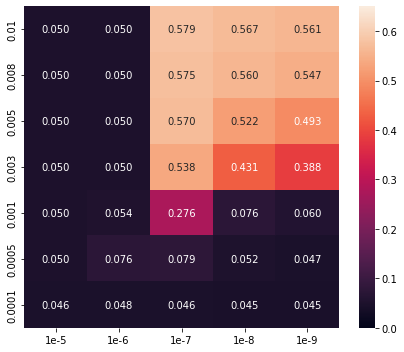

In [ ]:
a = pd.DataFrame(score)
a.columns = ['1e-5', '1e-6', '1e-7', '1e-8', '1e-9']
a.rows = ['0.01', '0.008', '0.005', '0.003', '0.001', '0.0005', '0.0001']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.axes().set_facecolor('white')
sns.heatmap(a, vmin = 0,vmax=0.65,annot=True, fmt ='.3f', yticklabels=['0.01', '0.008', '0.005', '0.003', '0.001', '0.0005', '0.0001'])
plt.tight_layout()
plt.savefig('tune_lr_l2reg.png')

In [ ]:
args2 = deepcopy(args)
model_dir = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.model'
id_bank_dir = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.pickle'
with open(id_bank_dir, 'rb') as centralid_file:
    my_id_bank = pickle.load(centralid_file)
mymodel = Model(args, my_id_bank)
mymodel.load(model_dir)

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(13135, 24)
  (gmf_embedding_item): Embedding(3024, 24)
  (mlp_embedding_user): Embedding(13135, 16)
  (mlp_embedding_item): Embedding(3024, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=16, bias=True)
  )
  (affine_output): Linear(in_features=40, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Pretrained weights from checkpoints/t1_none_newera.model are loaded!


In [ ]:
a = mymodel.model.affine_output.weight
list(a.detach().numpy()) ## after decrease negative sample

[array([-3.7795046e-01, -3.4457183e-01, -3.1924966e-01,  3.7405184e-01,
        -3.6592543e-01,  3.3929378e-01,  3.6263445e-01, -3.5807815e-01,
        -3.8204446e-01, -3.1892782e-01,  3.6766115e-01,  3.3093750e-01,
         4.2153841e-01, -3.9577463e-01,  3.4611386e-01,  3.2825613e-01,
        -3.4050366e-01,  3.2440177e-01, -3.3866969e-01, -3.2769167e-01,
        -3.8053679e-01,  3.7522858e-01,  3.2445052e-01, -3.6280113e-01,
         7.9160117e-02,  4.6506548e-01, -4.7372818e-01, -1.2381218e-02,
        -4.4568647e-02,  7.2960079e-01, -2.5297704e-01,  1.0679835e-01,
        -8.5897315e-03, -3.5472799e-04, -6.2426411e-02, -1.7831250e-03,
        -8.4843457e-02,  4.5015950e-02,  5.0447738e-01, -1.0182265e-01],
       dtype=float32)]

In [ ]:
#args.pretrain = f'checkpoints/{args.tgt_market}_{args.src_markets}_{args.exp_name}.model'
args.num_negative = 10
args.num_epoch = 10
args.batch_size = 1024
args.fastmode = True
args.use_qrel = False
build(args)

Running experiment on device: cpu
Loading target market t1: DATA/t1/train_5core.tsv
Loaded target data!

Loading s1: DATA/s1/train_5core.tsv
Loading s2: DATA/s2/train_5core.tsv
Loaded source data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(14984, 20)
  (gmf_embedding_item): Embedding(11074, 20)
  (mlp_embedding_user): Embedding(14984, 20)
  (mlp_embedding_item): Embedding(11074, 20)
  (fc_layers): ModuleList(
    (0): Linear(in_features=40, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=20, bias=True)
  )
  (affine_output): Linear(in_features=40, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.03772844553288256  Time:  295.6457488536835
Total Valid Loss:  0.3337777058283488  Time:  0.032622575759887695
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.030903027090977624  Time:  29

0.5221056690948465

In [ ]:
args2 = deepcopy(args)
args2.tgt_market = 't2'
args2.src_markets = 's2-s3'
args2.use_qrel = False
args2.pretrain = None
args2.sample_func= lambda:random.uniform(0,0.2)
#args2.pretrain = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.model'
args2.tgt_market_valid = f'DATA/{args2.tgt_market}/valid_run.tsv'
args2.tgt_market_test = f'DATA/{args2.tgt_market}/test_run.tsv'
args2.idbank_pretrain = None
args2.num_negative = 15
args2.batch_size = 1024
args2.num_epoch = 10
args2.lr = 0.01
args2.fastmode = True
build(args2)

Running experiment on device: cpu
Loading target market t2: DATA/t2/train_5core.tsv
Loaded target data!

Loading s2: DATA/s2/train_5core.tsv
Loading s3: DATA/s3/train_5core.tsv
Loaded source data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(15920, 24)
  (gmf_embedding_item): Embedding(4710, 24)
  (mlp_embedding_user): Embedding(15920, 16)
  (mlp_embedding_item): Embedding(4710, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=16, bias=True)
  )
  (affine_output): Linear(in_features=40, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.037790112448195114  Time:  183.04605793952942
Total Valid Loss:  0.4817862759033839  Time:  0.06336474418640137
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.027865523623337073  Time:  180

0.48043174082500556

In [ ]:
# load pretrained model 
model_dir = f'checkpoints/{args.tgt_market}_{args.src_markets}_{args.exp_name}.model'
id_bank_dir = f'checkpoints/{args.tgt_market}_{args.src_markets}_{args.exp_name}.pickle'

with open(id_bank_dir, 'rb') as centralid_file:
    my_id_bank= pickle.load(centralid_file)

mymodel = Model(args, my_id_bank)
mymodel.load(model_dir)
############
## Target Market Evaluation data
############
tgt_task_generator = TaskGenerator(my_id_bank)
args.batch_size = 2048
#tgt_valid_dataloader = tgt_task_generator.instance_a_market_valid_dataloader(args.tgt_market_valid, args.batch_size)
tgt_test_dataloader = tgt_task_generator.instance_a_market_valid_dataloader(args.tgt_market_test, args.batch_size)
print('loaded target test data!')
test_run_mf = mymodel.predict(tgt_test_dataloader)
write_run_file(test_run_mf, os.path.join('baseline_outputs', args.exp_name, args.tgt_market, 'test_pred.tsv'))
#valid_run_mf = mymodel.predict(tgt_valid_dataloader)
#write_run_file(valid_run_mf, os.path.join('baseline_outputs', args.exp_name, args.tgt_market, 'valid_pred.tsv'))

In [15]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
for i in range(4105, 4151):
    pil_im = Image.open(fr"C:\Users\HAI.NH194039\Documents\Nhập môn AI\New folder\IMG_{i}.JPG", 'r')
    w,h = pil_im.size
    left = 850
    top = 500
    right = w-150
    bottom = h-450
    im1 = pil_im.crop((left, top, right, bottom))
    #imshow(np.asarray(im1))
    im1.save(fr'C:\Users\HAI.NH194039\Documents\Nhập môn AI\dethi\IMG_{i}.JPG')

In [32]:
for i in (4124,):
    pil_im = Image.open(fr"C:\Users\HAI.NH194039\Documents\Nhập môn AI\New folder\IMG_{i}.JPG", 'r')
    w,h = pil_im.size
    left = 700
    top = 500
    right = w-300
    bottom = h-450
    im1 = pil_im.crop((left, top, right, bottom))
    #imshow(np.asarray(im1))
    im1.save(fr'C:\Users\HAI.NH194039\Documents\Nhập môn AI\dethi\IMG_{i}.JPG')